# Exercise 1: Global approach to image description

In [1]:
from a2_utils import *
import numpy as np
import os

from UZ_utils import *

In [2]:
def myhist(num_bins, I,minmax=False):

    max_val = 0
    min_val = 0

    if minmax:
        max_val = np.max(I)
        min_val = np.min(I)

    else:
        max_val = 255
        min_val = 0

    H=np.zeros(num_bins)
    bin_edges = np.linspace(min_val, max_val, num_bins + 1,endpoint=True)

    for i in I.reshape(-1):
          #calculate the bin index
            bin_index = np.digitize(i, bin_edges) - 1
            H[bin_index] += 1

    #normalize the histogram
    H = H / len(I.reshape(-1))

    return H


In [3]:
def myhist3(num_bins,Img,color='rgb'):
    #returns a 3d histogram of the image
    #input: number of bins, image

    #hsv to rgb
    if color == 'hsv':
        Img = cv2.cvtColor(Img, cv2.COLOR_HSV2RGB)

    #if gbr to rgb
    if color == 'gbr':
        Img = cv2.cvtColor(Img, cv2.COLOR_GBR2RGB)
        
    
    H = np.zeros((num_bins,num_bins,num_bins))

    #histogram for each channel

    #H[binR[1],binG[1],binB[1]] += 1
    #ho through each pixel
    
    bin_edges = np.linspace(0, 255, num_bins + 1,endpoint=True)
    for i in range(Img.shape[0]):
        for j in range(Img.shape[1]):
            #calculate the bin index
            binR = np.digitize(Img[i,j,0], bin_edges) - 1
            binG = np.digitize(Img[i,j,1], bin_edges) - 1
            binB = np.digitize(Img[i,j,2], bin_edges) - 1

            #if out of range
            if binR == num_bins:
                binR -= 1
            if binG == num_bins:
                binG -= 1
            if binB == num_bins:
                binB -= 1

            H[binR,binG,binB] += 1

    #normalize the histogram
    H = H / len(Img.reshape(-1,3))

    return H

    

In [4]:
def compare_histograms(H1,H2,type="Euclidean"):
    #compare two histograms using the Euclidean distance or the intersection
    #input: two histograms, type of comparison

    if type == "Euclidean":
        return np.sqrt(np.sum((H1-H2)**2))

    elif type == "Intersection":
        return np.sum(np.minimum(H1,H2))

    #Chi-square distance
    elif type == "Chi-square":
        return np.sum((H1-H2)**2/(H1+H2+1e-10))/2

    elif type == "Hellinger":
        return np.sqrt(np.sum((np.sqrt(H1)-np.sqrt(H2))**2))/np.sqrt(2)

    else:
        print("Invalid comparison type")
        return None

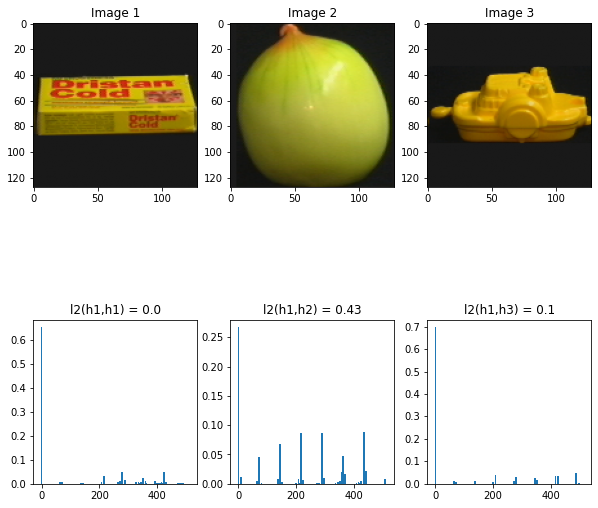

In [7]:
#open image




#open image
Img1 = imread('dataset/object_01_1.png') * 255


#show the 3d histogram using plt
H1 = myhist3(8, Img1.copy(), color='rgb')
#reshape to 1d
H1 = H1.reshape(-1)

#open image 2
Img2 = imread('dataset/object_02_1.png') * 255

#show the 3d histogram using axs
H2 = myhist3(8, Img2.copy(), color='rgb')

#reshape to 1d
H2 = H2.reshape(-1)

Img3 = imread('dataset/object_03_1.png') * 255

#show the 3d histogram using axs
H3 = myhist3(8, Img3.copy(), color='rgb')

#reshape to 1d
H3 = H3.reshape(-1)

L2_h1_h1 = compare_histograms(H1,H1,type="Euclidean")
#round to 2 decimal places
L2_h1_h1 = round(L2_h1_h1,2)

L2_h1_h2 = compare_histograms(H1,H2,type="Euclidean")
#round to 2 decimal places
L2_h1_h2 = round(L2_h1_h2,2)
L2_h1_h3 = compare_histograms(H1,H3,type="Euclidean")
#round to 2 decimal places
L2_h1_h3 = round(L2_h1_h3,2)



#plot the histograms in 3 by 3 grid
fig, axs = plt.subplots(2, 3, figsize=(10, 10))
axs[0, 0].imshow(Img1/255)
axs[0, 0].set_title('Image 1')
axs[0, 1].imshow(Img2/255)
axs[0, 1].set_title('Image 2')
axs[0, 2].imshow(Img3/255)
axs[0, 2].set_title('Image 3')

#plot the histograms as squares in 3 by 3 grid and make candles wider

axs[1, 0].bar(np.arange(512), H1, width=6)
axs[1, 0].set_title("l2(h1,h1) = " + str(L2_h1_h1))
axs[1, 0].set_aspect(1/axs[1, 0].get_data_ratio(), adjustable='box')
axs[1, 1].bar(np.arange(512), H2, width=6)
axs[1, 1].set_title("l2(h1,h2) = " + str(L2_h1_h2))
#square the histogram
axs[1, 1].set_aspect(1/axs[1, 1].get_data_ratio(), adjustable='box')
axs[1, 2].bar(np.arange(512), H3, width=6)
#square  plot
axs[1, 2].set_aspect(1/axs[1, 2].get_data_ratio(), adjustable='box')
axs[1, 2].set_title("l2(h1,h3) = " + str(L2_h1_h3))

#show plot
plt.show()


# #make np histogram rgb
# H1 = np.histogramdd(Img1.reshape(-1,3),bins=8,range=((0,255),(0,255),(0,255)))[0]
# #normalize
# H1 = H1 / len(Img1.reshape(-1,3))

# H1 = H1.reshape(-1)

# H2 = np.histogramdd(Img2.reshape(-1,3),bins=8,range=((0,255),(0,255),(0,255)))[0]
# #normalize
# H2 = H2 / len(Img2.reshape(-1,3))
# H2 = H2.reshape(-1)



# #plot the histograms
# plt.figure()
# plt.subplot(1,2,1)
# axs.bar(np.arange(len(H1)),H1,width=3)

# axs.subplot(1,2,2)
# axs.bar(np.arange(len(H2)),H2,width=3)
# axs.show()
# #make wi
# axs.show()


















In [10]:
def imgretrival(dir_name,num_bins):
    #get all the images in the directory
    files = os.listdir(dir_name)

    #create a list to store the images
    imgs = []

    #loop through all the files
    for file in files:
        #read the image
        img = imread(dir_name + "/" + file) * 255

        #append the image to the list
        imgs.append(img)

    #create a list to store the histograms
    histograms = []

    #loop through all the images
    for img in imgs:
        #calculate the histogram
        H = myhist3(num_bins, img.copy(), color='rgb')

        #append the histogram to the list
        histograms.append(H.reshape(-1))

    #create a list to store the distance
    image0 = "object_05_4.png"
    #het index van de image
    index = 0
    for i in range(len(files)):
        if files[i] == image0:
            index = i
            break

    #show the image
    plt.figure()
    plt.imshow(imgs[index]/255)
    plt.title("Query image")
    plt.show()
    

    
    #get the histogram of the first image
    H0 = histograms[index]


    results = []
    
    



    #loop through all the histograms
    for i in range(len(histograms)):
        #calculate the distance
        distL2 = compare_histograms(H0,histograms[i],type="Euclidean")
        distChi = compare_histograms(H0,histograms[i],type="Chi-square")
        distInter = compare_histograms(H0,histograms[i],type="Intersection")
        distHell = compare_histograms(H0,histograms[i],type="Hellinger")
        obj ={
            "histogram": histograms[i],
            "image": imgs[i],
            "distanceL2": round(distL2,2),
            "distanceChi": round(distChi,2),
            "distanceInter": round(distInter,2),
            "distanceHell": round(distHell,2),
            "name": files[i],
            "index": i


        }
        #append the distance to the list
        results.append(obj)

    #sort the distances
    fig, axs = plt.subplots(2, 6,layout="tight", figsize=(10, 10))
    #set white background
    fig.patch.set_facecolor('white')
    

    for i,measure in enumerate(["distanceHell"]):
        res_sorted = sorted(results, key=lambda x: x[measure])

        #plot the results show 5 closest images
        for j in range(6):
            #plot the image
            axs[i,j].imshow(res_sorted[j]["image"]/255)
            axs[i,j].set_title(res_sorted[j]["name"])
            #add padding beetwen images
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            
            #show histogram in next row
            axs[i+1,j].bar(np.arange(len(res_sorted[j]["histogram"])),res_sorted[j]["histogram"],width=6)
            axs[i+1,j].set_title(measure[len("distance")::] + " = " + str(res_sorted[j][measure]))
            #make the hisogram square
            #remov top padding
            axs[i+1,j].set_aspect(1/axs[i+1,j].get_data_ratio(), adjustable='box')
            
                

    

            

    #show plot
    #
    plt.tight_layout()
    plt.show()

    fig, axs = plt.subplots(4, 6,layout="tight", figsize=(10, 10))
    #set white background
    fig.patch.set_facecolor('white')
    

    for i,measure in enumerate(["distanceHell","distanceL2","distanceChi","distanceInter"]):
        res_sorted = sorted(results, key=lambda x: x[measure],reverse=measure == "distanceInter")

        #plot the results show 5 closest images
        for j in range(6):
            #plot the image
            axs[i,j].imshow(res_sorted[j]["image"]/255)
            axs[i,j].set_title(res_sorted[j]["name"])
            #add text for the distance
            axs[i,j].text(0,0,measure[len("distance")::] + " = " + str(res_sorted[j][measure]),color="white",bbox=dict(facecolor='black', alpha=0.5))
            #add padding beetwen images
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
            




    #plot the distances and images 

    plt.figure()
    #make this big plot

    
    #show as line plot
    #set background color


    plt.plot(np.arange(len(results)),[x["distanceL2"] for x in results])
    #title
    plt.title("L2 distance")

    plt.show()
    plt.plot(np.arange(len(results)),[x["distanceChi"] for x in results])
    #title
    plt.title("Chi distance")
    plt.show()
    plt.plot(np.arange(len(results)),[x["distanceInter"] for x in results])
    #title
    plt.title("Inter distance")
    plt.show()
    plt.plot(np.arange(len(results)),[x["distanceHell"] for x in results])
    #title
    plt.title("Hell distance")
    #show the least 5 distances
    #sort the distances
    results_sorted = sorted(results, key=lambda x: x["distanceHell"])


    #show the 5 closest images as circles on the plot
    for i in range(6):
        plt.scatter(results_sorted[i]["index"],results_sorted[i]["distanceHell"],marker="o",s=100,color="red")

    #
    #plt.legend(["L2","Chi","Inter","Hell"])

    #plot sorted histogram
    plt.figure()
    plt.plot(np.arange(len(results)),[x["distanceHell"] for x in results_sorted])

    #show the first 5 images as circles on the plot
    for i in range(6):
        plt.scatter(i,results_sorted[i]["distanceHell"],marker="o",s=100,color="red")

        

    
    plt.show()

    #reset rcParams    


    return (H0,results)










# image retrieval system

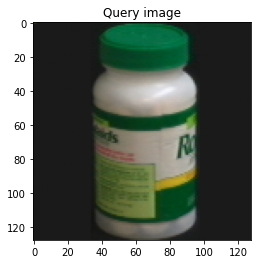

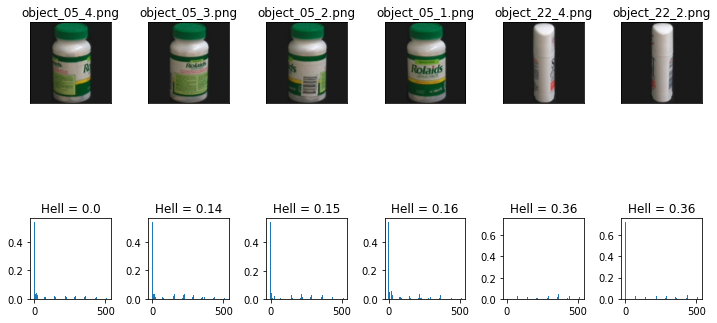

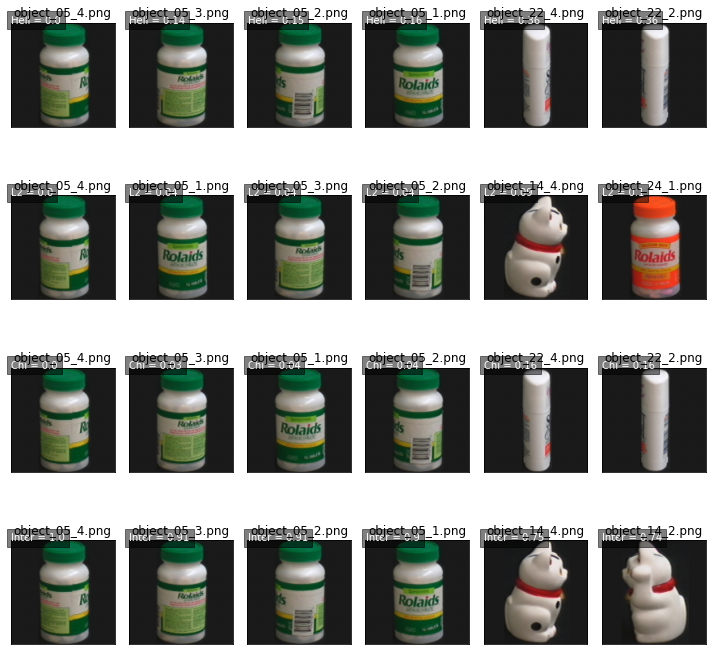

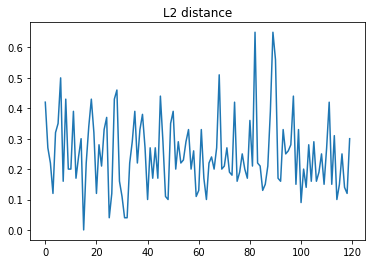

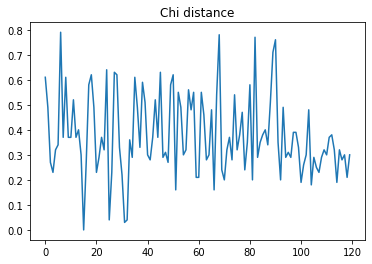

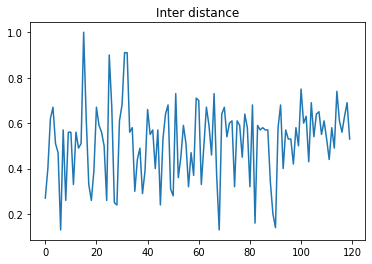

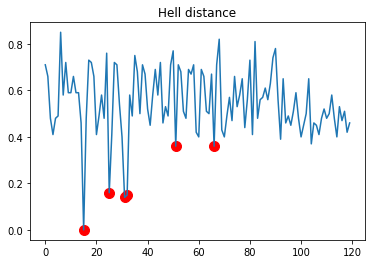

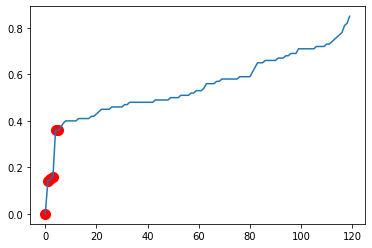

In [11]:
H0,results=imgretrival("dataset",8)




# frequency-based weighting tech- nique

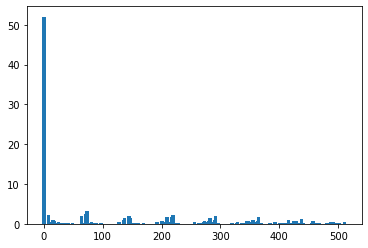

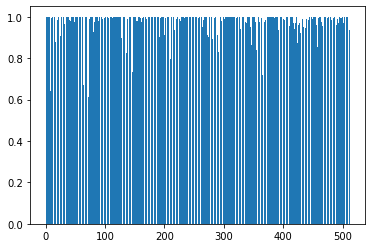

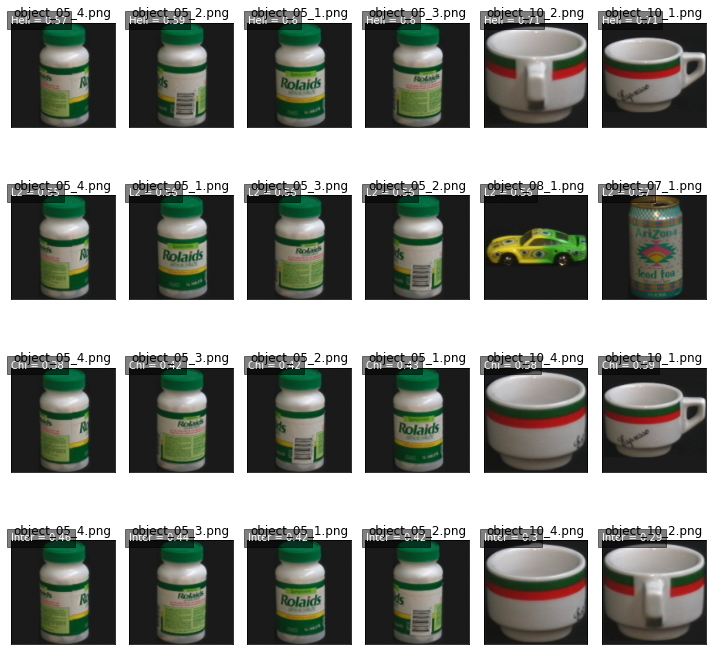

In [12]:
histograms=[x["histogram"] for x in results]

# binwise sum of the histograms
sum_hist = np.sum(histograms,axis=0)

#plot the histogram
plt.bar(np.arange(len(sum_hist)),sum_hist,width=6)
plt.show()

#implement a simple frequency-based weighting
#calculate the frequency of each bin

weights = np.zeros(len(sum_hist))
for i in range(len(sum_hist)):
    lam=0.2
    weights[i] = np.exp(-lam*sum_hist[i])

#plot the weights
plt.bar(np.arange(len(weights)),weights)
#make bigger


plt.show()

weigted_results = []
for i in range(len(results)):
    #calculate the weighted histogram
    weighted_hist = results[i]["histogram"]*weights
    #normalize the histogram
    weighted_hist = weighted_hist/np.sum(weighted_hist)
    
    #calculate the weighted distance
    distHell = compare_histograms(H0,weighted_hist,type="Hellinger")
    distL2 = compare_histograms(H0,weighted_hist,type="Euclidean")
    distChi = compare_histograms(H0,weighted_hist,type="Chi-square")
    distInter = compare_histograms(H0,weighted_hist,type="Intersection")

    obj ={
            "histogram": weighted_hist,
            "image": results[i]["image"],
            "distanceHell": round(distHell,2),
            "distanceL2": round(distL2,2),
            "distanceChi": round(distChi,2),
            "distanceInter": round(distInter,2),
            "name": results[i]["name"],
            "index": i


        }
    #append the distance to the list
    weigted_results.append(obj)


fig, axs = plt.subplots(4, 6,layout="tight", figsize=(10, 10))
    #set white background
fig.patch.set_facecolor('white')
    

for i,measument in enumerate(["distanceHell","distanceL2","distanceChi","distanceInter"]):
    #sort the results
    res_sorted = sorted(weigted_results, key=lambda x: x[measument],reverse=measument == "distanceInter")

    #plot the results show 5 closest images

    
    for j in range(6):
        #plot the image
        axs[i,j].imshow(res_sorted[j]["image"]/255)
        axs[i,j].set_title(res_sorted[j]["name"])

        #add text for the distance
        axs[i,j].text(0,0,measument[len("distance")::] + " = " + str(res_sorted[j][measument]),color="white",bbox=dict(facecolor='black', alpha=0.5))
        #add padding beetwen images
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        


# 2. Convolution

In [13]:
def simple_convolution(I,k,N,padding=False):
    #1d convolution
    # I is signal
    # k is kernel
    # size is the size of the kernel and is 2N+1

    res=I.copy()

    if padding:
        #add padding to the signal
        I = np.pad(I, N, mode='constant', constant_values=0)

        for i in range(len(I)-2*N):
            #calculate the convolution
            res[i] = np.sum(I[i:i+2*N+1]*k)

    else:
     
        for i in range(N,len(I)-N):
            #calculate the convolution
            #skip the edges

            res[i] = np.sum(I[i-N:i+N+1]*k)


    return res



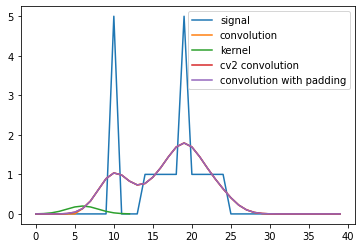

The sum of the kernel is:  0.9999999974


In [14]:
signal = read_data("signal.txt")
kernel = read_data("kernel.txt")

res=simple_convolution(signal.copy(),kernel,(len(kernel)-1)//2,padding=False)
res2=simple_convolution(signal.copy(),kernel,(len(kernel)-1)//2,padding=True)

#cv convolution
res_cv = cv2.filter2D(signal.copy(),-1,kernel)

plt.plot(signal)
plt.plot(res)
#plot kernel
plt.plot(kernel)
plt.plot(res_cv)
plt.plot(res2)

plt.legend(["signal","convolution","kernel","cv2 convolution","convolution with padding"])

plt.show()

#Can we recognize the shape of the kernel
#by looking at the convolution result?
# if pixels are all 1

#sum the elements of the kernel
sum_kernel = np.sum(kernel)

#print the result
print("The sum of the kernel is: ",sum_kernel)






In [15]:
def gausian_kernel(sigma):
    #limit to  2 ∗ ⌈3σ⌉ + 1
    N = int(2*np.ceil(3*sigma)+1)
    #create a kernel 1d from -N to N
    x = np.arange(-N,N+1)

    

    #calculate the kernel
    kernel = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-x**2/(2*sigma**2))

    #normalize the kernel
    kernel = kernel/np.sum(kernel)



    return (N,kernel)
    



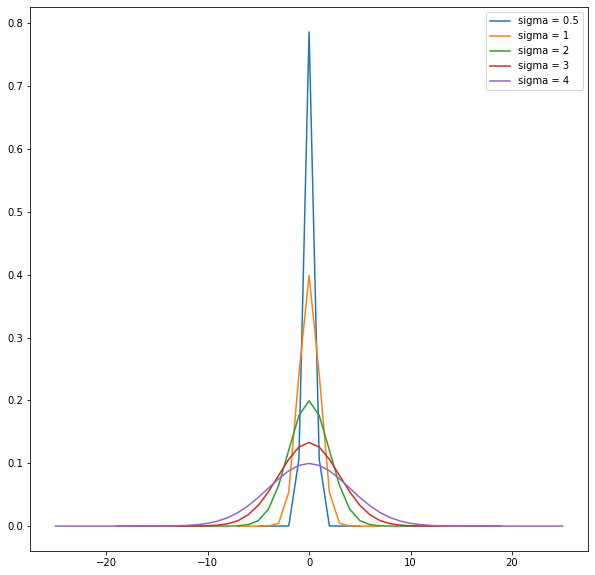

In [16]:
plt.figure(figsize=(10,10))

for sigma in [0.5,1,2,3,4]:
    N,kernel = gausian_kernel(sigma)
    #plot the kernel
    plt.plot(range(-N, N + 1), kernel, label=f"sigma = {sigma}")
    
plt.legend()
plt.show()

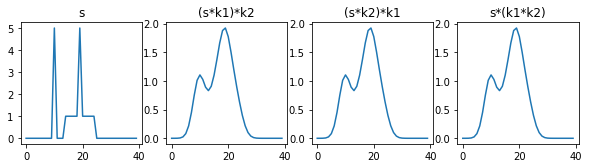

In [28]:
#test asocciativity of convolution

k1=gausian_kernel(2)[1]
k2=np.array([0.1, 0.6, 0.4])

s = read_data("signal.txt")

#cv convolution
res_cv = cv2.filter2D(s.copy(),-1,k1)
res_cv = cv2.filter2D(res_cv,-1,k2)

res_cv2 = cv2.filter2D(s.copy(),-1,k2)
res_cv2 = cv2.filter2D(res_cv2,-1,k1)

k3=np.convolve(k1,k2)

res_cv3 = cv2.filter2D(s.copy(),-1,k3)

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
#set white background
fig.patch.set_facecolor('white')
axs[0].plot(s)
axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable='box')
axs[0].set_title("s")

axs[1].plot(res_cv)
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable='box')
axs[1].set_title("(s*k1)*k2")
axs[2].plot(res_cv2)
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable='box')
axs[2].set_title("(s*k2)*k1")
axs[3].plot(res_cv3)
axs[3].set_aspect(1/axs[3].get_data_ratio(), adjustable='box')
axs[3].set_title("s*(k1*k2)")

plt.show()









# Exercise 3: Image filtering

In [49]:
def gaussfilter(I,sigma):
    gauss=gausian_kernel(sigma)[1]

    #cv convolution
    res_cv = cv2.filter2D(I.copy(),-1,gauss)
    res_cv = cv2.filter2D(res_cv,-1,gauss.T)

    return res_cv

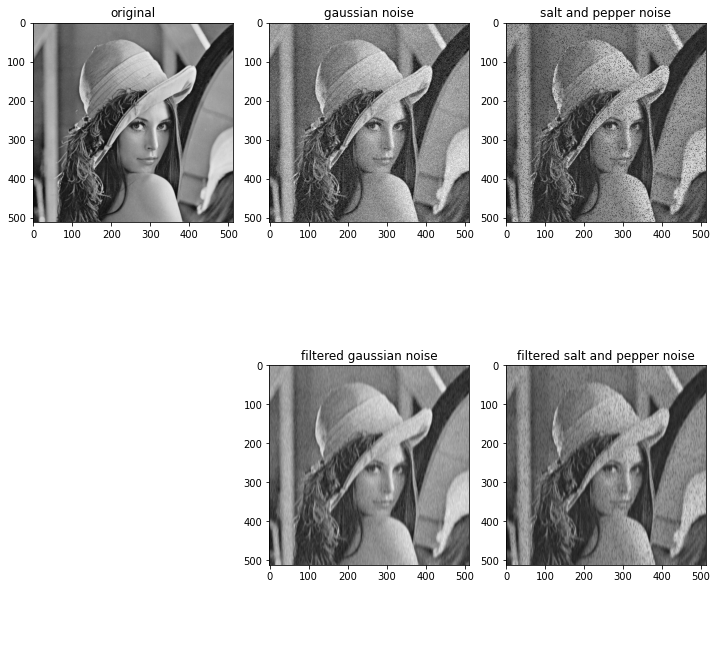

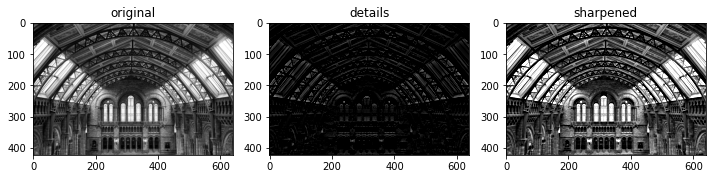

In [71]:
#open image grayscale

I = imread_gray("images/lena.png") * 255
#as int
I = I.astype(np.uint8)

#apply noise 
gauss_noise_img = gauss_noise(I.copy(),255/10)

salt_peper_img = sp_noise(I.copy(),0.1)

#apply filter

filtered1 = gaussfilter(gauss_noise_img.copy(),2)
filtered2 = gaussfilter(salt_peper_img.copy(),2)

fig, axs = plt.subplots(2, 3, figsize=(10, 10))

#set white background
fig.patch.set_facecolor('white')

axs[0,0].imshow(I,cmap="gray")
axs[0,0].set_title("original")
axs[0, 0].set_aspect(1/axs[0, 0].get_data_ratio(), adjustable='box')


axs[0,1].imshow(gauss_noise_img,cmap="gray",vmax=255,vmin=0)
axs[0,1].set_title("gaussian noise")
axs[0, 1].set_aspect(1/axs[0, 1].get_data_ratio(), adjustable='box')

#salt and pepper noise
axs[0,2].imshow(salt_peper_img,cmap="gray",vmax=255,vmin=0)
axs[0,2].set_title("salt and pepper noise")
axs[0, 2].set_aspect(1/axs[0, 2].get_data_ratio(), adjustable='box')

#filtered
axs[1,1].imshow(filtered1,cmap="gray",vmax=255,vmin=0)
axs[1,1].set_title("filtered gaussian noise")
axs[1, 1].set_aspect(1/axs[1, 1].get_data_ratio(), adjustable='box')

#set this plot to not be visible
axs[1,0].axis('off')



#filtered
axs[1,2].imshow(filtered2,cmap="gray",vmax=255,vmin=0)
axs[1,2].set_title("filtered salt and pepper noise")
axs[1, 2].set_aspect(1/axs[1, 2].get_data_ratio(), adjustable='box')

#compact
plt.tight_layout()


plt.show()

#sharpening

#open image grayscale

I = imread_gray("images/museum.jpg") * 255

details=I.copy()-gaussfilter(I.copy(),8)

sharpened=I.copy()+details

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

#set white background
fig.patch.set_facecolor('white')

axs[0].imshow(I,cmap="gray")
axs[0].set_title("original")

#show details
axs[1].imshow(details,cmap="gray",vmax=255,vmin=0)
axs[1].set_title("details")

#show sharpened
axs[2].imshow(sharpened,cmap="gray",vmax=255,vmin=0)
axs[2].set_title("sharpened")

#compact
plt.tight_layout()

plt.show()











In [76]:
#nonlinear median filter
def simple_median(I,width):
    #1d median filter on 1d array
    
    window=np.zeros(width)
    res=np.zeros(len(I))

    #zero padding
    I=np.concatenate((np.zeros(width//2),I,np.zeros(width//2)))

    for i in range(len(I)-width-1):
        window=I[i:i+width]
        res[i+width//2]=np.median(window)

    return res


       
    






Text(0.5, 1.0, 'median filter')

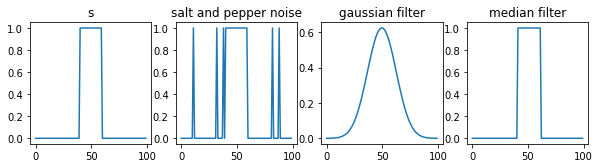

In [77]:
#create a  1d signal
s=np.zeros(100)
s[40:60]=1

#apply salt and pepper noise
s_sp=s.copy()
s_sp[np.random.rand(s.shape[0]) < 0.1 / 2] = 1
s_sp[np.random.rand(s.shape[0]) < 0.1 / 2] = 0

#gausian filter
sp_gaus=gaussfilter(s.copy(),8)

#median filter
sp_med=simple_median(s_sp.copy(),5)

fig, axs = plt.subplots(1, 4, figsize=(10, 10))
#set white background
fig.patch.set_facecolor('white')
axs[0].plot(s)
axs[0].set_aspect(1/axs[0].get_data_ratio(), adjustable='box')
axs[0].set_title("s")

axs[1].plot(s_sp)
axs[1].set_aspect(1/axs[1].get_data_ratio(), adjustable='box')
axs[1].set_title("salt and pepper noise")

axs[2].plot(sp_gaus)
axs[2].set_aspect(1/axs[2].get_data_ratio(), adjustable='box')
axs[2].set_title("gaussian filter")

axs[3].plot(sp_med)
axs[3].set_aspect(1/axs[3].get_data_ratio(), adjustable='box')
axs[3].set_title("median filter")







In [ ]:
#2-D version of the median filter
#TODO: implement a 2d version of the median filter